In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns

In [26]:
#Import data

df = pd.read_csv('teams.csv')
df.tail()

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
25,26,Milwaukee Bucks,E,C,33,49,0.402,-4.18,105.06,109.65,-4.59,-3.98,105.32,109.69,-4.37
26,27,Phoenix Suns,W,P,23,59,0.280,-6.66,102.94,109.80,-6.86,-6.32,102.95,109.45,-6.50
27,28,Brooklyn Nets,E,A,21,61,0.256,-7.35,103.74,111.60,-7.86,-7.11,104.06,111.66,-7.61
28,29,Los Angeles Lakers,W,P,17,65,0.207,-9.56,102.29,112.40,-10.12,-8.92,102.49,111.92,-9.43
29,30,Philadelphia 76ers,E,A,10,72,0.122,-10.23,99.65,110.15,-10.50,-9.92,99.83,110.01,-10.18


### Offense vs. defense – which matters more? 

First: offensive rating.

In [12]:
off_x = df['ORtg']
off_y = df['W']

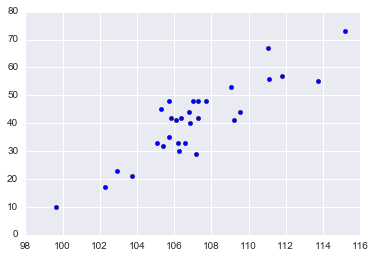

In [13]:
plt.scatter(off_x, off_y)

In [14]:
slope, intercept, r_value, p_value, std_error = stats.linregress(off_x, off_y)

print 'The slope is:' , slope
print 'The intercept is:' , intercept
print 'The r^2 is:' , r_value**2
print 'The p value is:' , p_value
print 'The std error is:' , std_error

The slope is: 3.7908539333
The intercept is: -365.12934529
The r^2 is: 0.782516342331
The p value is: 8.86685986056e-11
The std error is: 0.377680568553


Second: defensive rating.

In [15]:
def_x = df['DRtg']
def_y = df['W']

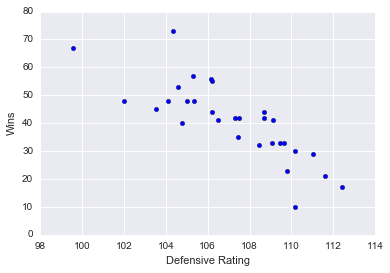

In [19]:
plt.scatter(def_x, def_y)
plt.xlabel('Defensive Rating')
plt.ylabel('Wins')

In [18]:
slope, intercept, r_value, p_value, std_error = stats.linregress(def_x, def_y)

print 'The slope is:' , slope
print 'The intercept is:' , intercept
print 'The r^2 is:' , r_value**2
print 'The p value is:' , p_value
print 'The std error is:' , std_error

The slope is: -3.8186646996
The intercept is: 450.106278151
The r^2 is: 0.664372514061
The p value is: 4.15180056643e-08
The std error is: 0.512926860424


Both of these regressions are statistically significant, and show that a better rating means more wins (just that a better rating in defense is a lower number, so the correlation is negative).

Let's draw a residual plot for defensive rating to make sure we chose the right model.

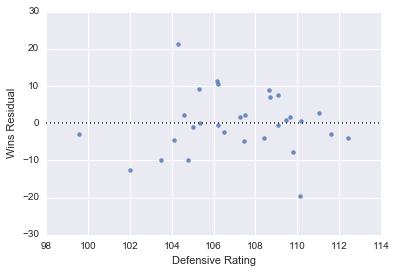

In [25]:
sns.residplot(x=def_x, y=def_y)
plt.xlabel('Defensive Rating')
plt.ylabel('Wins Residual')

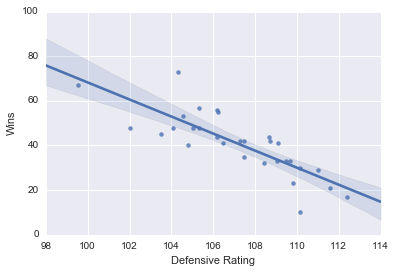

In [24]:
sns.regplot(x=def_x, y=def_y)
plt.xlabel('Defensive Rating')
plt.ylabel('Wins')

### Removing the two major outliers

The Warriors and the 76ers.

In [28]:
no_outliers = df[df['Team'] != 'Golden State Warriors']
no_outliers = no_outliers[no_outliers['Team'] != 'Philadelphia 76ers']

Rerun the regression.

In [34]:
x = no_outliers['DRtg']
y = no_outliers['W']

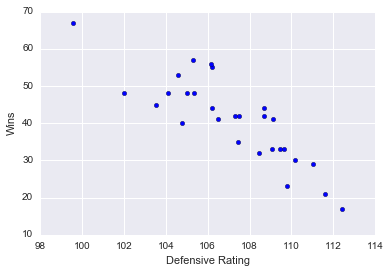

In [35]:
plt.scatter(x, y)
plt.xlabel('Defensive Rating')
plt.ylabel('Wins')

In [36]:
slope, intercept, r_value, p_value, std_error = stats.linregress(x, y)

print 'The slope is:' , slope
print 'The intercept is:' , intercept
print 'The r^2 is:' , r_value**2
print 'The p value is:' , p_value
print 'The std error is:' , std_error

The slope is: -3.31983418493
The intercept is: 396.605079741
The r^2 is: 0.726607867612
The p value is: 8.55424058126e-09
The std error is: 0.399367460607


Removing the two outliers decreased the slope by .5, increased the R^2 by 6%, lowered the P value, and lowered the standard error by .1.

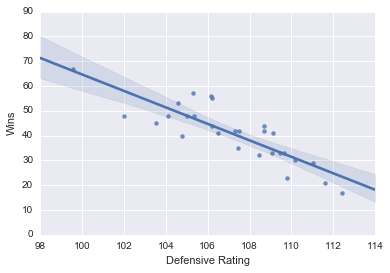

In [40]:
sns.regplot(x=x, y=y)
plt.xlabel('Defensive Rating')
plt.ylabel('Wins')

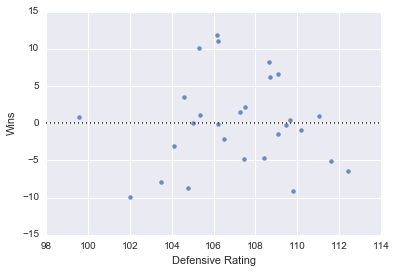

In [41]:
sns.residplot(x=x, y=y)
plt.xlabel('Defensive Rating')
plt.ylabel('Wins')